# EDA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Первый взгляд:

**Общая информация**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
pd.set_option('display.max_columns', None)
print(df.describe())
pd.reset_option('display.max_columns')

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

**Посмотрим на пропущенные значения в фрейме**

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

* PoolQC, MiscFeature, Fence и связанные с ними значения, имеют много пропусков - следует обратить на них внимание и либо удалить, либо исправить.

**Посмотрим на количество уникальных значений для каждого признака**

In [7]:
pd.set_option('display.max_rows', None)

print(df.nunique())

pd.reset_option('display.max_rows')

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

**Взглянем на самые дорогие дома, чтобы понять какие особенные значения признаков могут на это влиять:**

In [8]:
df.sort_values(by="SalePrice", ascending=False).head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000


## Распределение числовых данных:

**Распределение цен на недвижимость относительно типа недвижимости:**

<Axes: xlabel='BldgType', ylabel='SalePrice'>

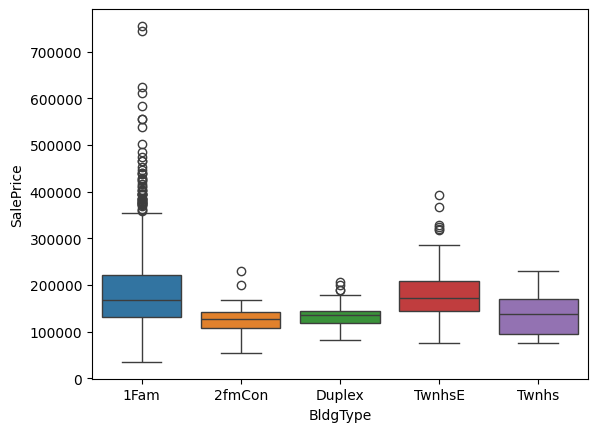

In [9]:
sns.boxplot(x='BldgType', y='SalePrice', hue='BldgType', data=df)

* Дома на две семьи - дешевле остальных
* "Обычные" дома имееют больше всего выбросов, самый большой разброс и соотвественно максимум/минимум.
* На втором месте по цене - Таунхаусы(внешн.), они же имеют самую высокую минимальную цену

<Axes: xlabel='BldgType', ylabel='SalePrice'>

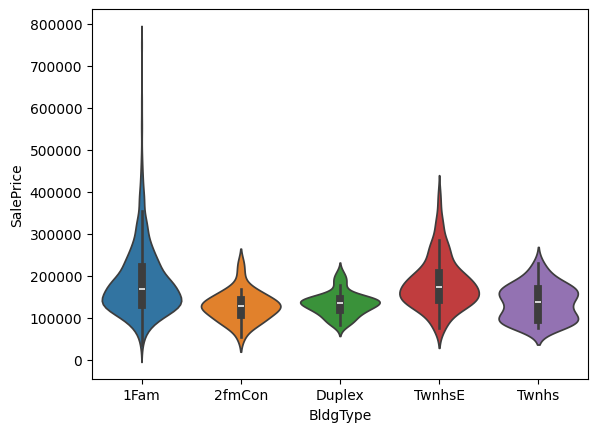

In [10]:
sns.violinplot(x='BldgType', y='SalePrice', hue='BldgType', data=df)

Более наглядно показаны распределения цен:
* Таунхаусы(внутр.) имеют аж два "пика" распределения цен. Вероятно в них есть какие-то признаки, который координально влияют на цену внутри этого класса.

**Просто интересно распределение продаж по годам**

In [11]:
bins=df['YrSold'].max()-df['YrSold'].min()+1
bins*2

np.int64(10)

<Axes: xlabel='YrSold', ylabel='Count'>

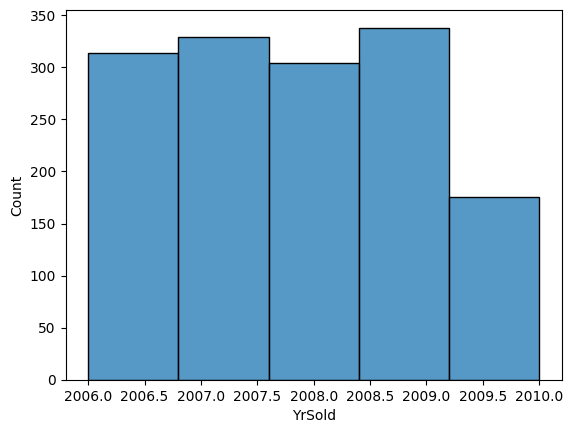

In [12]:
sns.histplot(x='YrSold', bins=(df['YrSold'].max()-df['YrSold'].min()+1), data=df)

## Категориальные данные:

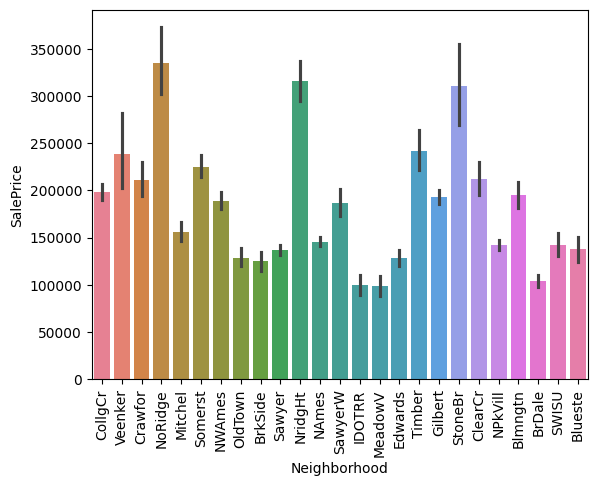

In [13]:
sns.barplot(y='SalePrice', x='Neighborhood', hue='Neighborhood', data=df)

plt.xticks(rotation=90)
plt.show()

## Корреляция:

In [14]:
interest_cols = [
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'TotRmsAbvGrd',
    '1stFlrSF',
    'FullBath',
    'BsmtFinSF1',
    'YearBuilt',
    'YearRemodAdd',
    'LotArea'
]

df[interest_cols].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotRmsAbvGrd,1stFlrSF,FullBath,BsmtFinSF1,YearBuilt,YearRemodAdd,LotArea
SalePrice,1.000000,0.790982,0.708624,0.640409,0.533723,0.605852,0.560664,0.386420,0.522897,0.507101,0.263843
OverallQual,0.790982,1.000000,0.593007,0.600671,0.427452,0.476224,0.550600,0.239666,0.572323,0.550684,0.105806
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.825489,0.566024,0.630012,0.208171,0.199010,0.287389,0.263116
GarageCars,0.640409,0.600671,0.467247,1.000000,0.362289,0.439317,0.469672,0.224054,0.537850,0.420622,0.154871
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,1.000000,0.409516,0.554784,0.044316,0.095589,0.191740,0.190015
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.409516,1.000000,0.380637,0.445863,0.281986,0.240379,0.299475
FullBath,0.560664,0.550600,0.630012,0.469672,0.554784,0.380637,1.000000,0.058543,0.468271,0.439046,0.126031
BsmtFinSF1,0.386420,0.239666,0.208171,0.224054,0.044316,0.445863,0.058543,1.000000,0.249503,0.128451,0.214103
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.095589,0.281986,0.468271,0.249503,1.000000,0.592855,0.014228
YearRemodAdd,0.507101,0.550684,0.287389,0.420622,0.191740,0.240379,0.439046,0.128451,0.592855,1.000000,0.013788


<Axes: >

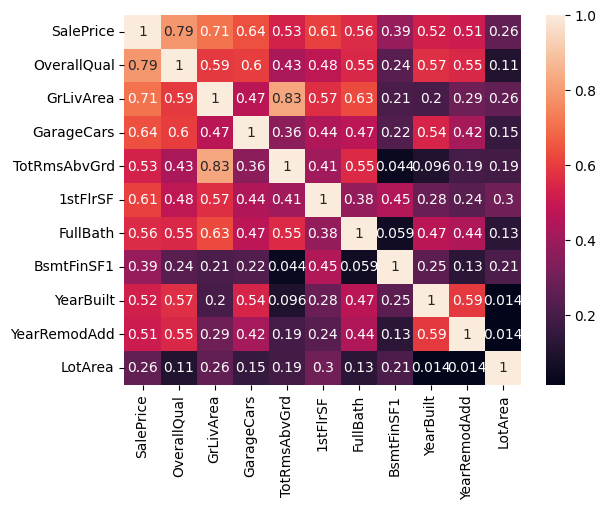

In [15]:
sns.heatmap(df[interest_cols].corr(), annot = True)

* Отличная корреляция Цена-ОбщееКачество, Цена-ЖилПлощадь;
* Остальные признаки в целом тоже неплохо коррелируют;
* А вот LotArea(и некоторые другие), возможно можно будет удалить без особых последствий. 